# Reference
https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(0)

X, y = make_blobs(n_samples=100, n_features=2, centers=[[-0.5, -0.2], [+0.5, 0.], [0., 0.5]], cluster_std=0.1)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10.)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

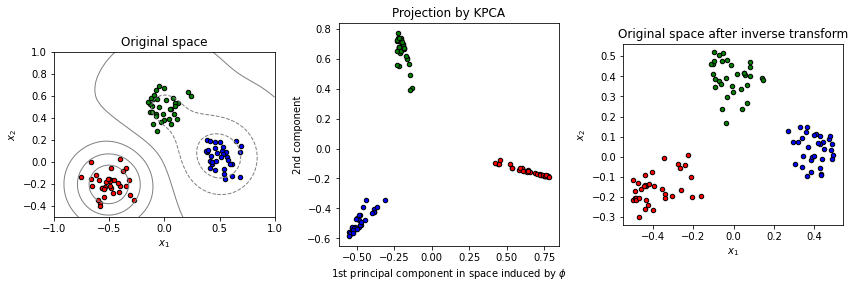

In [3]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1, aspect="equal")
plt.title("Original space")
reds = y == 0
blues = y == 1
greens = y == 2

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor="k")
plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor="k")
plt.scatter(X[greens, 0], X[greens, 1], c="green", s=20, edgecolor="k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.0, 1.0, 50), np.linspace(-0.5, 1.0, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors="grey", linewidths=1, origin="lower")

plt.subplot(1, 3, 2, aspect="equal")
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor="k")
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue", s=20, edgecolor="k")
plt.scatter(X_kpca[greens, 0], X_kpca[greens, 1], c="green", s=20, edgecolor="k")
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(1, 3, 3, aspect="equal")
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red", s=20, edgecolor="k")
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue", s=20, edgecolor="k")
plt.scatter(X_back[greens, 0], X_back[greens, 1], c="green", s=20, edgecolor="k")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()

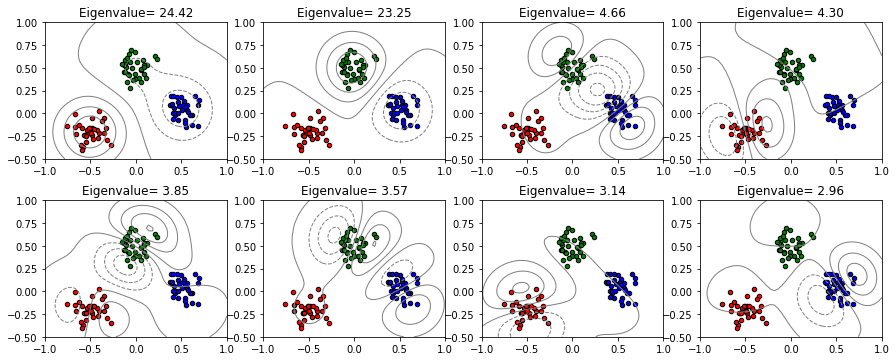

In [4]:
reds = y == 0
blues = y == 1
greens = y == 2

plt.figure(figsize=(15, 6))

X1, X2 = np.meshgrid(np.linspace(-1., 1., 50), np.linspace(-0.5, 1., 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
for icomp in range(8):
    plt.subplot(2, 4, icomp + 1, aspect="equal")
    plt.title(f"Eigenvalue={kpca.eigenvalues_[icomp]: 0.2f}")

    plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor="k")
    plt.scatter(X[blues, 0], X[blues, 1], c="blue", s=20, edgecolor="k")
    plt.scatter(X[greens, 0], X[greens, 1], c="green", s=20, edgecolor="k")

    Z_grid = kpca.transform(X_grid)[:, icomp].reshape(X1.shape)
    plt.contour(X1, X2, Z_grid, colors="grey", linewidths=1, origin="lower")
